# **Assignment Four on 02/07/2024**

## **Installing PRAW package**

In [ ]:
# Install package praw which allows us to intract with Reddit API using Python
#!pip install praw  

## **Authentication**

In [2]:
import praw  # Importing praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036" 
reddit = praw.Reddit(
    client_id="TjDs35RvVf7zqcgc8BrEQw", # My User ID
    client_secret="LNU5kTy-ij320beV7lLzfwqh0RlcUw", # My User client Key
    user_agent=user_agent
)

## **Importing required packages such as Pandas, Numpy, Re.**

In [3]:
import pandas as pd  # Importing Pandas as pd
import numpy as np   # Importing numpy as np
import re            # RegEx : Regular expression

C:\Users\srima\AppData\Local\Temp\ipykernel_37788\1614073244.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # Importing Pandas as pd


## **Get Trending Topic from your Subreddit**

The **"bitcoin"** subreddit channel will be use for this project

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("war").hot(limit=None): # Using Trending Topic as Bitcoin
    print(submission.title)# Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Russian snipers successfully engage the lead AFU soldier of a travelling group.
1aqrczc
CardioVascular9352
1707929037.0
145
0.71
https://v.redd.it/ksfegxbixkic1
0


 ## **Get total comment in Subreddit**

In [23]:
headlines = set()
for submission in reddit.subreddit("war").hot(limit=None): # Retreving the tittle of hot posts in Bitcoin subreddit.
    headlines.add(submission.title)
print(len(headlines)) # Printing the no of Unique Headlines

989


## **Creating a DataFrame.**

In [24]:
#Create a dataframe from the scrapped data 
war_df = pd.DataFrame(headlines)
war_df.head() # Printing the top Five Rows

,0
0,Russian soldiers hide behind a destroyed Leopa...
1,How do you think society will view potential W...
2,Beautiful beach of gaza Before/After
3,NSFW
4,Russian drunken activities....


In [25]:
war_df.head() # Printing the Top Five Rows

,0
0,Russian soldiers hide behind a destroyed Leopa...
1,How do you think society will view potential W...
2,Beautiful beach of gaza Before/After
3,NSFW
4,Russian drunken activities....


## **Adding Column Names**

In [26]:
war_df.columns # Printing the Column Names.

RangeIndex(start=0, stop=1, step=1)

In [27]:
war_df.columns = ['Titles'] # Adding Column Names


In [28]:
war_df.head() # Printing top Five Rows

,Titles
0,Russian soldiers hide behind a destroyed Leopa...
1,How do you think society will view potential W...
2,Beautiful beach of gaza Before/After
3,NSFW
4,Russian drunken activities....


## **Checking For Duplictes.**

In [29]:
war_df.Titles.duplicated().sum()   # Printing the Sum of Duplicates.

0

## **Cleaning the TExt**

In [30]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
war_df["Titles"]= war_df["Titles"].apply(cleanTxt)

#Show the clean text
war_df.head()

,Titles
0,Russian soldiers hide behind a destroyed Leopa...
1,How do you think society will view potential W...
2,Beautiful beach of gaza Before/After
3,NSFW
4,Russian drunken activities....


In [31]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
war_df["Titles"]= war_df["Titles"].apply(remove_emoji)

#Show the clean text
war_df.head()

,Titles
0,Russian soldiers hide behind a destroyed Leopa...
1,How do you think society will view potential W...
2,Beautiful beach of gaza Before/After
3,NSFW
4,Russian drunken activities....


## **Installing Textblob**

In [32]:
#!pip install textblob

In [33]:
from textblob import TextBlob ## Importing TextBlob
from wordcloud import WordCloud, STOPWORDS  

In [34]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
war_df['Subjectivity'] = war_df['Titles'].apply(getSubjectivity)
war_df['Polarity'] = war_df['Titles'].apply(getPolarity)

#Now display data
war_df.head()

,Titles,Subjectivity,Polarity
0,Russian soldiers hide behind a destroyed Leopa...,0.350000,-0.20
1,How do you think society will view potential W...,0.333333,0.00
2,Beautiful beach of gaza Before/After,1.000000,0.85
3,NSFW,0.000000,0.00
4,Russian drunken activities....,0.000000,0.00


In [35]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
war_df["Insight"] = war_df["Polarity"].apply(getInsight)

war_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Russian soldiers hide behind a destroyed Leopa...,0.350000,-0.200000,Negative
1,How do you think society will view potential W...,0.333333,0.000000,Neutral
2,Beautiful beach of gaza Before/After,1.000000,0.850000,Positive
3,NSFW,0.000000,0.000000,Neutral
4,Russian drunken activities....,0.000000,0.000000,Neutral
5,"Russia has Massed 500 Tanks eyeing Kupyansk, U...",0.000000,0.000000,Neutral
6,HAMAS Fighter close range RPG action targeting...,0.100000,0.100000,Positive
7,Captain of the U.S. Aircraft Carrier Eisenhowe...,0.000000,0.000000,Neutral
8,Do you think shotguns would be practical in ba...,0.000000,0.000000,Neutral
9,Vremasky drone drops.,0.000000,0.000000,Neutral


## **Data Visualization**

In [19]:
import seaborn as sns # Importing seaborn Package
import warnings 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt # Importing matplotlib.pyplot
plt.style.use('fivethirtyeight')

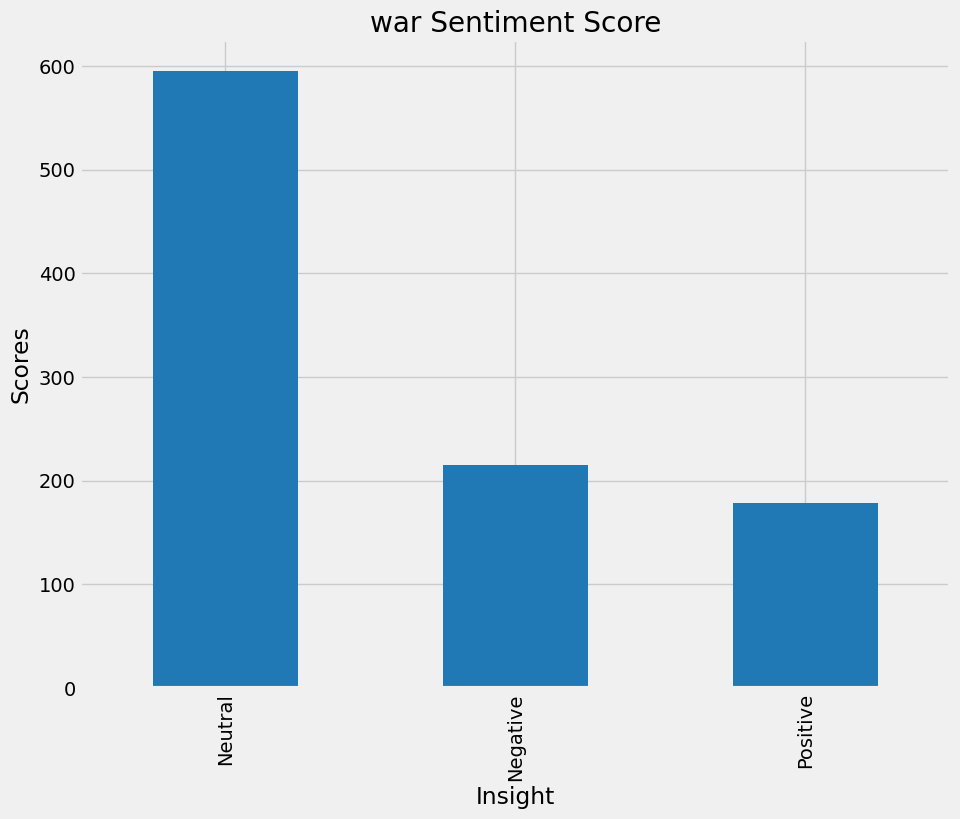

In [37]:
#Plot the values count of sentiment
plt.title("war Sentiment Score")
plt.xlabel("Sentiment") # X-axis
plt.ylabel("Scores") # Y-axis
plt.rcParams["figure.figsize"] = (10,8) # Figure Size
war_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

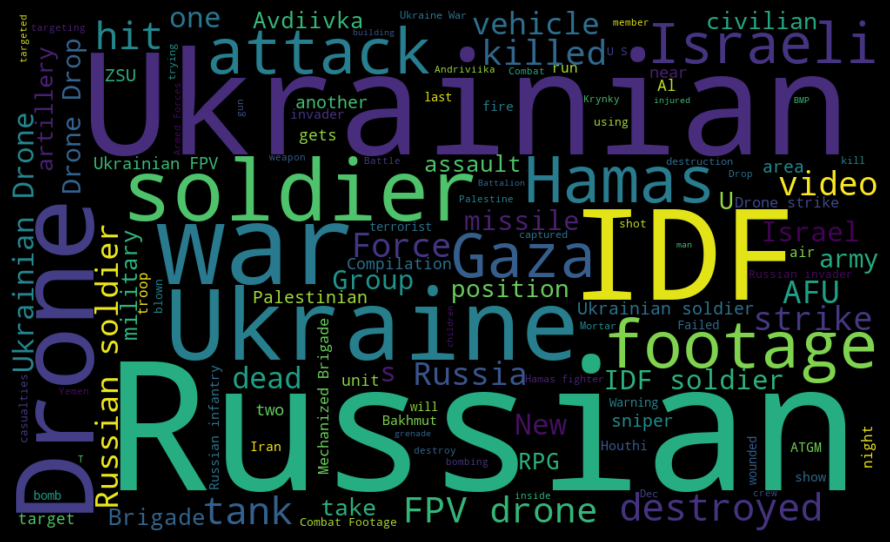

In [42]:
text = ' '.join( [twts for twts in war_df['Titles']] ) # To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 120,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

# Display the generated image:
plt.figure( figsize=(10,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");